In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 125MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf

In [19]:
from tensorflow import keras

In [20]:
from keras import Sequential

In [24]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout

In [25]:
train_set=keras.utils.image_dataset_from_directory(
    directory="train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256) # all images would be rshape into 256 by 256 pixel in rows and columns
)


test_set=keras.utils.image_dataset_from_directory(
    directory="test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256) # all images would be rshape into 256 by 256 pixel in rows and columns
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
train_set=train_set.map(process)
test_set=test_set.map(process)

In [28]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history=model.fit(train_set,epochs=10,validation_data=test_set)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 86ms/step - accuracy: 0.5830 - loss: 2.5134 - val_accuracy: 0.6890 - val_loss: 0.5836
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7108 - loss: 0.5594 - val_accuracy: 0.7310 - val_loss: 0.5464
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.7730 - loss: 0.4804 - val_accuracy: 0.7252 - val_loss: 0.5394
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8088 - loss: 0.4203 - val_accuracy: 0.7862 - val_loss: 0.4707
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.8406 - loss: 0.3613 - val_accuracy: 0.6890 - val_loss: 1.0584
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8750 - loss: 0.3068 - val_accuracy: 0.8034 - val_loss: 0.4808
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9094 - loss: 0.2194 - val_accuracy: 0.7770 - val_loss: 0.5367
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9416 - loss: 0.1578 - 

In [32]:
import matplotlib.pyplot as plt

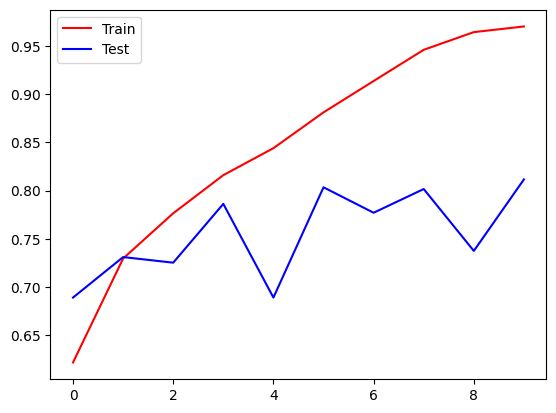

In [33]:
plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Test')
plt.legend()
plt.show()

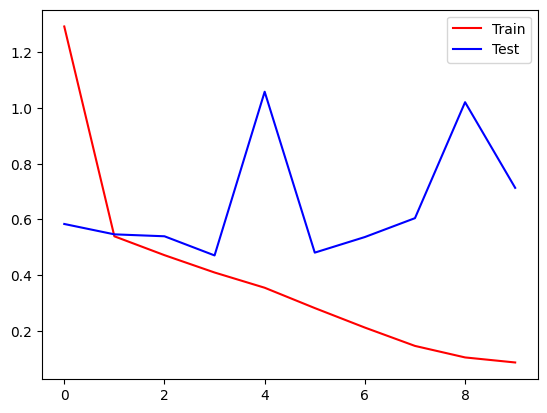

In [34]:
plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Test')
plt.legend()
plt.show()

In [95]:
import cv2

In [96]:
test_img = cv2.imread('/content/kutta.jpeg')

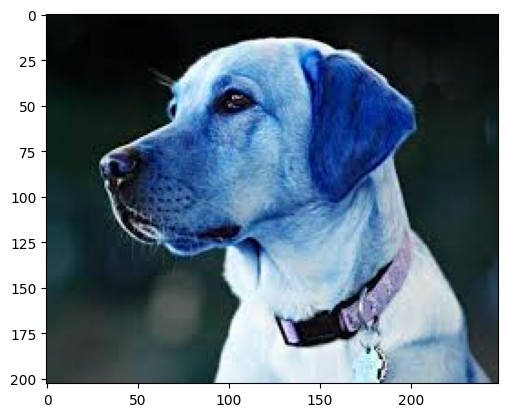

In [97]:
plt.imshow(test_img)

In [98]:
test_img.shape

(203, 248, 3)

In [99]:
test_img = cv2.resize(test_img, (256,256))


In [100]:
test_input = test_img.reshape((1,256,256,3))


In [101]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)